In [1]:
###################### Imports ######################

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from matplotlib import rcParams
import glob as glob
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.gridspec as gridspec
import scipy.stats as st
import matplotlib.colors as colors
import matplotlib as mp
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering

###################### Custom colormap ######################
import matplotlib as mp
cmap = mp.cm.get_cmap('Paired')
cmap(X=0)
list_cmap_corrected = [cmap(X=1),cmap(X=3),cmap(X=5),cmap(X=7),cmap(X=9),cmap(X=11)]

###################### Figure style initiation ######################

rcParams.update({'figure.autolayout': True})
MP_LINEWIDTH = 2.
MP_TICKSIZE = 10.
tick_size = 15 
pl.rc('axes', linewidth=MP_LINEWIDTH, edgecolor='k')

# Data imports

## RNAseq data

In [2]:
RNA_data = pd.read_csv("./data/RNA_data.csv", index_col= 0)
RNA_data.head()

,R1 MOCK 0h,R2 MOCK 0h,R1 LPS 0h,R2 LPS 0h,R1 MOCK 01h,R2 MOCK 01h,R1 LPS 01h,R2 LPS 01h,R1 MOCK 02h,R2 MOCK 02h,...,R1 LPS 06h,R2 LPS 06h,R1 MOCK 09h,R2 MOCK 09h,R1 LPS 09h,R2 LPS 09h,R1 MOCK 12h,R2 MOCK 12h,R1 LPS 12h,R2 LPS 12h
Gene Group,,,,,,,,,,,,,,,,,,,,,
Gphn,16.420774,20.332473,16.420774,20.332473,13.333051,13.444587,17.221022,17.859139,8.978326,11.742045,...,28.081796,31.764885,11.318641,11.751758,22.770763,22.382750,14.130799,10.773190,24.201671,28.537305
Actn1,334.088792,397.535880,334.088792,397.535880,322.762893,374.818653,391.960311,382.802402,274.027559,426.439230,...,611.900860,678.592853,360.580482,413.002922,452.331682,533.476342,386.375576,419.559372,319.215801,474.387154
Cul4b,23.149569,18.490939,23.149569,18.490939,24.291620,21.831639,27.358002,17.523768,20.508543,18.985117,...,16.295221,13.302869,24.010361,22.237673,13.551874,13.373896,26.200695,20.252792,16.625934,16.128440
Txn2,303.866030,295.778750,303.866030,295.778750,360.687086,279.836152,266.169489,220.217116,361.210744,267.339292,...,107.001001,81.574585,348.826571,302.863775,92.452049,119.673648,328.613828,261.945167,91.329979,98.009427
Rpl19,2839.648797,2547.251463,2839.648797,2547.251463,2795.011899,3275.830623,2725.651733,2555.572257,3073.746545,2699.560924,...,2343.131318,2578.953467,2759.071453,3033.572347,2388.922224,1933.714030,2758.984089,3043.758371,2441.861469,2140.264212


## MS data (proteins)

In [3]:
P_data = pd.read_csv("./data/protein_data.csv", index_col= 0)
P_data.head()

,M/L MOCK R1 0h,H/L MOCK R1 0h,M/L LPS R1 0h,H/L LPS R1 0h,M/L MOCK R2 0h,H/L MOCK R2 0h,M/L LPS R2 0h,H/L LPS R2 0h,M/L MOCK R1 0.5h,H/L MOCK R1 0.5h,...,M/L LPS R2 12h,H/L LPS R2 12h,M/L MOCK R1 24,H/L MOCK R1 24,M/L LPS R1 24,H/L LPS R1 24,M/L MOCK R2 24,H/L MOCK R2 24,M/L LPS R2 24,H/L LPS R2 24
Gene Group,,,,,,,,,,,,,,,,,,,,,
Gphn,12.096074,0.297156,12.096074,0.297156,6.505031,0.349632,6.505031,0.349632,6.224527,0.269136,...,5.473032,1.480302,3.682307,0.960561,7.893304,5.169083,3.987898,2.390066,5.854278,3.172792
Actn1,132.360291,10.987842,132.360291,10.987842,133.761650,10.373869,133.761650,10.373869,118.447806,16.063269,...,121.248341,30.700277,108.599219,26.549907,112.275538,43.432444,106.208688,25.096000,102.920516,43.541895
Cul4b,8.320294,0.753200,8.320294,0.753200,6.405256,4.520843,6.405256,4.520843,7.261301,1.477359,...,6.095240,1.400039,4.342109,2.490151,2.966669,2.436352,5.878535,3.904356,5.113453,3.703049
Txn2,18.172083,3.832494,18.172083,3.832494,NaN,NaN,NaN,NaN,18.131656,8.133736,...,13.495227,1.564171,18.642921,4.132716,NaN,NaN,NaN,NaN,10.029196,2.102674
Rpl19,425.431939,62.002934,425.431939,62.002934,529.701706,43.580299,529.701706,43.580299,414.024187,56.376897,...,496.728929,107.109777,413.956399,109.287652,436.776113,160.401852,545.003483,182.520276,605.854306,196.250215


## Modeling data (rates)

In [4]:
param_data = pd.read_csv("./data/param_estimates_microshares.csv", index_col= 0)
param_data.head()

,D0.R1.ESTIMATE,D0.R1.CI.LOW,D0.R1.CI.HI,D0.R2.ESTIMATE,D0.R2.CI.LOW,D0.R2.CI.HI,D(MOCK).R1.ESTIMATE,D(MOCK).R1.CI.LOW,D(MOCK).R1.CI.HI,D(MOCK).R2.ESTIMATE,...,M0.R1.CI.HI,M0.R2.ESTIMATE,M0.R2.CI.LOW,M0.R2.CI.HI,grass.R1.ESTIMATE,grass.R1.CI.LOW,grass.R1.CI.HI,grass.R2.ESTIMATE,grass.R2.CI.LOW,grass.R2.CI.HI
Gene Group,,,,,,,,,,,,,,,,,,,,,
Aifm1,0.011576,0.004181,0.032047,0.005972,0.002139,0.016673,1.301801,0.780848,2.170314,1.188609,...,80.637068,85.690797,81.053327,90.593599,17.983471,15.833314,20.425617,14.910980,13.271567,16.752906
Tmem214,0.024201,0.003216,0.182099,0.073208,0.039778,0.134734,1.349957,0.798573,2.282049,2.624270,...,2.784356,1.849789,1.442988,2.371274,2.098246,1.384802,3.179254,1.017224,0.657861,1.572892
Smad2,0.032068,0.024664,0.041695,0.035396,0.026947,0.046494,0.855036,0.560842,1.303551,0.809163,...,10.368326,11.584888,11.222288,11.959204,1.053275,0.717038,1.547182,0.715147,0.546163,0.936416
Pcnt,0.021072,0.005949,0.074644,0.017826,0.007970,0.039873,1.368431,0.808442,2.316313,1.271858,...,0.629408,0.525449,0.474155,0.582291,0.168062,0.129819,0.217571,0.138020,0.116675,0.163270
Stx5a,0.005316,0.001582,0.017860,0.021171,0.004145,0.108138,1.222198,0.736129,2.029221,1.539285,...,5.897320,7.695222,5.719027,10.354286,2.700372,1.968230,3.704856,2.067505,1.458028,2.931751


## Rates processing

In [5]:
RNA_measured_0_LPS = []
RNA_measured_12_LPS = []
P_measured_0_LPS = []
P_measured_12_LPS = []
computed_s = []
computed_k = []
computed_s0 = []
computed_k0 = []
count = 0
list_genes = []
for gene in RNA_data.index:
    if gene in param_data.index:
        RNA_measured_0_LPS += [np.mean(RNA_data.loc[gene, ["R1 LPS 0h", "R2 LPS 0h"]])]
        RNA_measured_12_LPS += [np.mean(RNA_data.loc[gene, ["R1 LPS 12h", "R2 LPS 12h"]])]
        computed_s += [np.mean(param_data.loc[gene, ["T(LPS).R1.ESTIMATE", "T(LPS).R2.ESTIMATE"]])]
        computed_k += [np.mean(param_data.loc[gene, ["D(LPS).R1.ESTIMATE", "D(LPS).R2.ESTIMATE"]])]
        computed_s0 += [np.mean(param_data.loc[gene, ["T0.R1.ESTIMATE", "T0.R2.ESTIMATE"]])]
        computed_k0 += [np.mean(param_data.loc[gene, ["D0.R1.ESTIMATE", "D0.R2.ESTIMATE"]])]
        prot_R1_0 = np.sum(P_data.loc[gene, ["M/L LPS R1 0h", "H/L LPS R1 0h"]]) 
        prot_R2_0 = np.sum(P_data.loc[gene, ["M/L LPS R2 0h", "H/L LPS R2 0h"]]) 
        prot_R1_12 = np.sum(P_data.loc[gene, ["M/L LPS R1 12h", "H/L LPS R1 12h"]]) 
        prot_R2_12 = np.sum(P_data.loc[gene, ["M/L LPS R2 12h", "H/L LPS R2 12h"]]) 
        P_measured_0_LPS += [np.mean([prot_R1_0,prot_R2_0])]
        P_measured_12_LPS +=[np.mean([prot_R1_12,prot_R2_12])]
        list_genes += [gene]
    else:
        count+=1
FI_RNA = np.array(RNA_measured_12_LPS)/np.array(RNA_measured_0_LPS)
FI_P = np.array(P_measured_12_LPS)/np.array(P_measured_0_LPS)
FI_P_theo = FI_RNA*np.array(computed_s)/np.array(computed_k)
print(count)

List_s_0 = np.array(RNA_measured_0_LPS)*np.array(computed_s0)
List_s_12 = np.array(RNA_measured_12_LPS)*np.array(computed_s0)*np.array(computed_s)
List_k_0 = np.array(computed_k0)
List_k_12 = np.array(computed_k0)*np.array(computed_k)

0


/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/617388235.py:29: RuntimeWarning: divide by zero encountered in true_divide
  FI_P = np.array(P_measured_12_LPS)/np.array(P_measured_0_LPS)


# Contributions computation

In [6]:
List_a_RNA =  np.abs((np.array(RNA_measured_12_LPS) - np.array(RNA_measured_0_LPS)) * np.array(computed_s0)*np.array(computed_s))
List_a_translation = np.abs(np.array(RNA_measured_0_LPS)*(np.array(computed_s0)*np.array(computed_s) - np.array(computed_s0)))
List_a_P = np.abs(np.array(computed_k0)*np.array(computed_k) * (np.array(P_measured_12_LPS) - np.array(P_measured_0_LPS)))
List_a_degradation = np.abs(P_measured_0_LPS * (np.array(computed_k0)*np.array(computed_k) - np.array(computed_k0)))


List_a_RNA_abs =  (np.array(RNA_measured_12_LPS) - np.array(RNA_measured_0_LPS)) * np.array(computed_s0)*np.array(computed_s)
List_a_translation_abs = np.array(RNA_measured_0_LPS)*(np.array(computed_s0)*np.array(computed_s) - np.array(computed_s0))
List_a_P_abs = np.array(computed_k0)*np.array(computed_k) * (np.array(P_measured_12_LPS) - np.array(P_measured_0_LPS))
List_a_degradation_abs = P_measured_0_LPS * (np.array(computed_k0)*np.array(computed_k) - np.array(computed_k0))

List_tot_percent = List_a_RNA + List_a_translation + List_a_P + List_a_degradation

List_RNA_percent = List_a_RNA/List_tot_percent
mean_RNA = np.mean(List_RNA_percent)

List_tanslation_percent = List_a_translation/List_tot_percent
mean_translation = np.mean(List_tanslation_percent)

List_P_percent = List_a_P/List_tot_percent
mean_P = np.mean(List_P_percent)

List_degradation_percent = List_a_degradation/List_tot_percent
mean_deg = np.mean(List_degradation_percent)

# Data processing (matrix formatting)

In [7]:
matrix_mixed = np.transpose(np.array([List_RNA_percent, List_tanslation_percent,List_P_percent, List_degradation_percent]))
matrix_mixed_io = np.transpose(np.array([List_RNA_percent+List_tanslation_percent,List_P_percent+List_degradation_percent]))

# Clustering

In [8]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(matrix_mixed)
list_index_cluster = cluster.fit_predict(matrix_mixed)

## Clusters processing

In [9]:
list_where_0 = np.where(list_index_cluster==0)
list_where_1 = np.where(list_index_cluster==1)
list_where_2 = np.where(list_index_cluster==2)
list_where_3 = np.where(list_index_cluster==3)
list_where_4 = np.where(list_index_cluster==4)
list_where_5 = np.where(list_index_cluster==5)

# Figure 2A

/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/1051538467.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2A.pdf",bbox_inches = 'tight')
/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/1051538467.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2A.pdf",bbox_inches = 'tight')
/Users/bmartin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


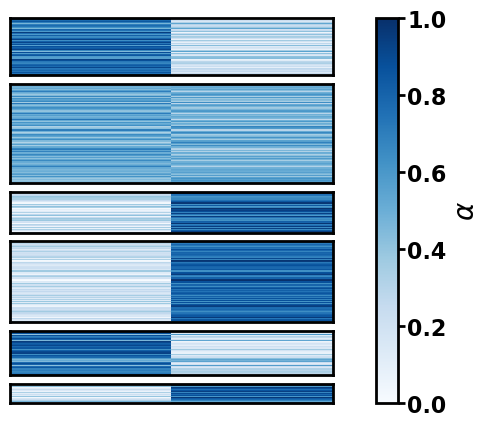

In [10]:
fig = pl.figure(figsize=(5,5))
gs = gridspec.GridSpec(6, 2,width_ratios=[15,1],height_ratios=[len(list_where_0[0]),len(list_where_1[0]),len(list_where_2[0]),len(list_where_3[0]),len(list_where_4[0]),len(list_where_5[0])])
gs.update(wspace=0.25, hspace=0.15) 

ax = pl.subplot(gs[0, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==0, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[1, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==1, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[2, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==2, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])



ax = pl.subplot(gs[3, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==3, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[4, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==4, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[5, 0])

pl.imshow(matrix_mixed_io[list_index_cluster==5, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])







ax = pl.subplot(gs[:, 1])
cb = pl.colorbar(cax=ax)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_weight("bold")
    l.set_fontsize(16)
cb.set_label(r'$\alpha$', size=20)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

pl.savefig("figures/figure2A.pdf",bbox_inches = 'tight')

# Figure 2B

/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/741726222.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2B.pdf",bbox_inches = 'tight')
/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/741726222.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2B.pdf",bbox_inches = 'tight')
/Users/bmartin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


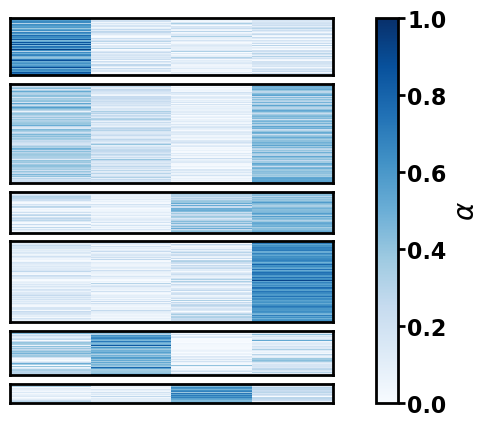

In [11]:
fig = pl.figure(figsize=(5,5))
gs = gridspec.GridSpec(6, 2,width_ratios=[15,1],height_ratios=[len(list_where_0[0]),len(list_where_1[0]),len(list_where_2[0]),len(list_where_3[0]),len(list_where_4[0]),len(list_where_5[0])])
gs.update(wspace=0.25, hspace=0.15) 

ax = pl.subplot(gs[0, 0])

pl.imshow(matrix_mixed[list_index_cluster==0, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[1, 0])

pl.imshow(matrix_mixed[list_index_cluster==1, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[2, 0])

pl.imshow(matrix_mixed[list_index_cluster==2, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])



ax = pl.subplot(gs[3, 0])

pl.imshow(matrix_mixed[list_index_cluster==3, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[4, 0])

pl.imshow(matrix_mixed[list_index_cluster==4, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[5, 0])

pl.imshow(matrix_mixed[list_index_cluster==5, :], interpolation='nearest',aspect='auto', vmin=0, vmax=1, cmap="Blues")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])







ax = pl.subplot(gs[:, 1])
cb = pl.colorbar(cax=ax)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_weight("bold")
    l.set_fontsize(16)
cb.set_label(r'$\alpha$', size=20)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

pl.savefig("figures/figure2B.pdf",bbox_inches = 'tight')

# Figure 2C

## Reclustering according to algebraic contributions

In [12]:
matrix_flux = np.array([List_a_RNA_abs/List_tot_percent, List_a_translation_abs/List_tot_percent, List_a_P_abs/List_tot_percent, List_a_degradation_abs/List_tot_percent ]).T
matrix_flux_io = np.array([List_a_RNA_abs/List_tot_percent + List_a_translation_abs/List_tot_percent, List_a_P_abs/List_tot_percent + List_a_degradation_abs/List_tot_percent ]).T


cluster_0 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_0.fit_predict(matrix_flux[list_index_cluster==0, :])
list_index_cluster_0 = cluster_0.fit_predict(matrix_flux[list_index_cluster==0, :])

cluster_1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_1.fit_predict(matrix_flux[list_index_cluster==1, :])
list_index_cluster_1 = cluster_1.fit_predict(matrix_flux[list_index_cluster==1, :])

cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_2.fit_predict(matrix_flux[list_index_cluster==2, :])
list_index_cluster_2 = cluster_2.fit_predict(matrix_flux[list_index_cluster==2, :])

cluster_3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_3.fit_predict(matrix_flux[list_index_cluster==3, :])
list_index_cluster_3 = cluster_3.fit_predict(matrix_flux[list_index_cluster==3, :])

cluster_4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_4.fit_predict(matrix_flux[list_index_cluster==4, :])
list_index_cluster_4 = cluster_4.fit_predict(matrix_flux[list_index_cluster==4, :])

cluster_5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_5.fit_predict(matrix_flux[list_index_cluster==5, :])
list_index_cluster_5 = cluster_5.fit_predict(matrix_flux[list_index_cluster==5, :])

/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/1584325167.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2E.pdf",bbox_inches = 'tight')
/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/1584325167.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/figure2E.pdf",bbox_inches = 'tight')
/Users/bmartin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


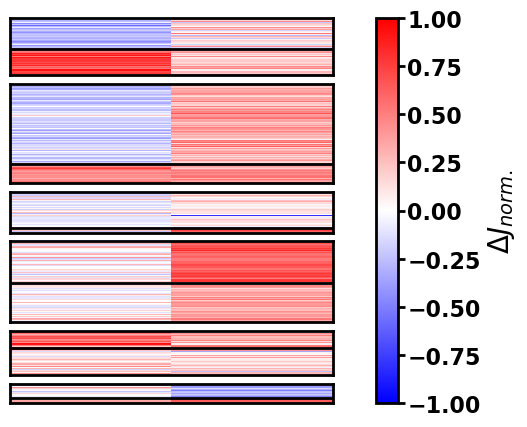

In [13]:
fig = pl.figure(figsize=(5,5))
gs = gridspec.GridSpec(6, 2,width_ratios=[15,1],height_ratios=[len(list_where_0[0]),len(list_where_1[0]),len(list_where_2[0]),len(list_where_3[0]),len(list_where_4[0]),len(list_where_5[0])])
gs.update(wspace=0.25, hspace=0.15) 

ax = pl.subplot(gs[0, 0])

pl.imshow(matrix_flux_io[list_index_cluster==0, :][np.argsort(list_index_cluster_0), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_0)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[1, 0])

pl.imshow(matrix_flux_io[list_index_cluster==1, :][np.argsort(list_index_cluster_1), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_1)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[2, 0])

pl.imshow(matrix_flux_io[list_index_cluster==2, :][np.argsort(list_index_cluster_2), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_2)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])



ax = pl.subplot(gs[3, 0])

pl.imshow(matrix_flux_io[list_index_cluster==3, :][np.argsort(list_index_cluster_3), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_3)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[4, 0])

pl.imshow(matrix_flux_io[list_index_cluster==4, :][np.argsort(list_index_cluster_4), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_4)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[5, 0])

pl.imshow(matrix_flux_io[list_index_cluster==5, :][np.argsort(list_index_cluster_5), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_5)).index(1),xmin=-0.5,xmax=1.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])







ax = pl.subplot(gs[:, 1])
cb = pl.colorbar(cax=ax)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_weight("bold")
    l.set_fontsize(16)
cb.set_label(r'$\Delta J_{norm.}$', size=20)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

pl.savefig("figures/figure2E.pdf",bbox_inches = 'tight')

# Figure 2D

/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/3545986373.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/Figure2D.pdf",bbox_inches = 'tight')
/var/folders/bd/qbf94lbd31ndy_1dknngh_wh0000gq/T/ipykernel_70066/3545986373.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig("figures/Figure2D.pdf",bbox_inches = 'tight')
/Users/bmartin/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


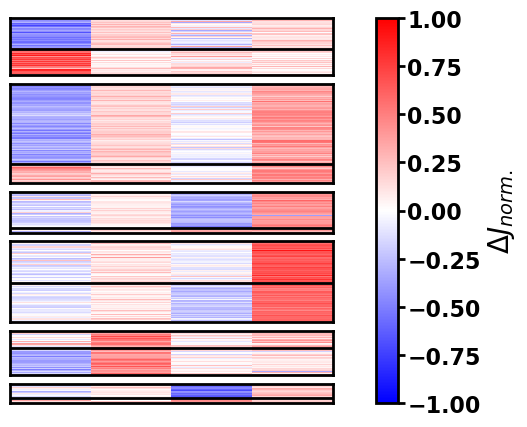

In [14]:
fig = pl.figure(figsize=(5,5))
gs = gridspec.GridSpec(6, 2,width_ratios=[15,1],height_ratios=[len(list_where_0[0]),len(list_where_1[0]),len(list_where_2[0]),len(list_where_3[0]),len(list_where_4[0]),len(list_where_5[0])])
gs.update(wspace=0.25, hspace=0.15) 

ax = pl.subplot(gs[0, 0])

pl.imshow(matrix_flux[list_index_cluster==0, :][np.argsort(list_index_cluster_0), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_0)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")

ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[1, 0])

pl.imshow(matrix_flux[list_index_cluster==1, :][np.argsort(list_index_cluster_1), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_1)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax = pl.subplot(gs[2, 0])

pl.imshow(matrix_flux[list_index_cluster==2, :][np.argsort(list_index_cluster_2), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_2)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])



ax = pl.subplot(gs[3, 0])

pl.imshow(matrix_flux[list_index_cluster==3, :][np.argsort(list_index_cluster_3), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_3)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[4, 0])

pl.imshow(matrix_flux[list_index_cluster==4, :][np.argsort(list_index_cluster_4), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_4)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])


ax = pl.subplot(gs[5, 0])

pl.imshow(matrix_flux[list_index_cluster==5, :][np.argsort(list_index_cluster_5), :], interpolation='nearest',aspect='auto', vmin=-1, vmax=1, cmap="bwr")
pl.hlines(y=list(np.sort(list_index_cluster_5)).index(1),xmin=-0.5,xmax=3.5, lw=2, color="k")



ax.tick_params(
    which='major',
    direction='in',
    bottom=False,
    top=False,
    left=False,
    right=False)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])







ax = pl.subplot(gs[:, 1])
cb = pl.colorbar(cax=ax)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_weight("bold")
    l.set_fontsize(16)
cb.set_label(r'$\Delta J_{norm.}$', size=20)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tick_size)
    tick.tick1line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
    tick.tick1line.set_markersize(0.5 * MP_TICKSIZE)
    tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)

pl.savefig("figures/Figure2D.pdf",bbox_inches = 'tight')

# Figure 2E

## Go-terms enrichment analysis

In [ ]:
import gseapy as gp
PT_clusters = []
for cluster_num in range(6):
    list_where = np.where(list_index_cluster==cluster_num)
    PT_down = gp.enrichr(gene_list=list(np.array(list_genes)[list_where]) ,
     gene_sets=['GO_Biological_Process_2021'],
     organism='Mouse', 
     cutoff=0.05 )
    PT_clusters += [PT_down]

In [ ]:
MP_LINEWIDTH = 4.
pl.rc('axes', linewidth=MP_LINEWIDTH, edgecolor='k')

proportions = []
for index,PT_down in enumerate(PT_clusters):
    proportions += [np.minimum(np.sum(PT_down.res2d["Adjusted P-value"]<0.05), 5)]

fig = pl.figure(figsize=(12,6*3.5))
gs = gridspec.GridSpec(6, 1, height_ratios=proportions)
gs.update(wspace=0.25, hspace=0.15) 



for index,PT_down in enumerate(PT_clusters): 
    ax = pl.subplot(gs[index, 0])
    number_bar = np.minimum(np.sum(PT_down.res2d["Adjusted P-value"]<0.05), 5)
    ax.barh(range(number_bar),-np.log10(PT_down.res2d[0:number_bar]["Adjusted P-value"][::-1]),tick_label= PT_down.res2d[0:number_bar]["Term"][::-1], color=list_cmap_corrected[index],alpha=0.8)
    ax.barh(range(number_bar),-np.log10(PT_down.res2d[0:number_bar]["Adjusted P-value"][::-1]),tick_label= PT_down.res2d[0:number_bar]["Term"][::-1], color="None", edgecolor="black",linewidth= 4,alpha=1)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_top()
    tick_size = 25
    if index==0:
        ax.set_xlabel("$-\log_{10}(adjusted \ p_{value})$", size=30,labelpad=25)
        ax.tick_params(
            which='major',
            direction='in',
            bottom=False,
            top=True,
            left=False,
            right=True)
    
    else:
        ax.axes.xaxis.set_ticklabels([])
        ax.tick_params(
            which='major',
            direction='in',
            bottom=False,
            top=False,
            left=False,
            right=True)
    ax.set_xlim(0,48)
    ax.set_ylim(-0.6,number_bar-1+0.6)
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label2.set_fontsize(tick_size)
        if index==0:
            tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
            tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
    for tick in ax.yaxis.get_major_ticks():
        tick.label2.set_fontsize(tick_size)
        tick.tick2line.set_markeredgewidth(MP_LINEWIDTH)
        tick.tick2line.set_markersize(0.5 * MP_TICKSIZE)
        
pl.savefig("figures/figure2E.pdf",bbox_inches = 'tight')      